In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
import cv2
import matplotlib.pyplot as plt

In [2]:

plus_dir = 'C:\Dataset\+'
minus_dir = 'C:\Dataset\-'
times_dir = 'C:/Dataset/times'
plus_names = listdir(plus_dir)
minus_names = listdir(minus_dir)
times_names = listdir(times_dir)

In [3]:
plus_len = len([name for name in listdir(plus_dir)])
minus_len = len([name for name in listdir(minus_dir)])
times_len = len([name for name in listdir(times_dir)])

In [22]:
train_names = plus_names + minus_names + times_names
train_labels = []
for i in range(0, plus_len):
    train_labels.append(0)
for i in range(plus_len, plus_len + minus_len):
    train_labels.append(1)
for i in range(plus_len + minus_len, plus_len + minus_len + times_len):
    train_labels.append(2)

In [21]:
X_train = ([])

for name in train_names:
    X_train.append(cv2.imread(name, 0))
    X_train[len(X_train) - 1] = np.reshape(X_train[len(X_train) - 1], (45, 45, 1))
    X_train[len(X_train) - 1] = X_train[len(X_train) - 1].astype('float32')
    X_train[len(X_train) - 1] /= 255
X_train = tf.convert_to_tensor(X_train)
print(train_labels[0])

plus


In [14]:
for i in range(0, plus_len):
    train_names[i] = plus_dir + '/' + train_names[i]
for i in range(plus_len, plus_len + minus_len):
    train_names[i] = minus_dir + '/' + train_names[i]
for i in range(plus_len + minus_len, plus_len + minus_len + times_len):
    train_names[i] = times_dir + '/' + train_names[i]

In [69]:
import cv2

def preprocessing(train_names):
    X_train = tf.zeros((plus_len + minus_len + times_len))
    for name in train_names:
        X_train.append(cv2.imread(name, 0))
        X_train[len(X_train) - 1] = np.reshape(X_train[len(X_train) - 1], (1, 45, 45, 1))
        X_train[len(X_train) - 1] = X_train[len(X_train) - 1].astype('float32')
        X_train[len(X_train) - 1] /= 255
    return X_train

In [36]:
X_train = np.asarray(X_train)
train_labels = np.asarray(train_labels)
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

model.fit(X_train, train_labels,
        batch_size = 32,
        epochs = 5,
          shuffle = True
        )

Train on 11434 samples
Epoch 1/5
11434/11434 [==============================] - 43s 4ms/sample - loss: 0.0032 - accuracy: 0.9990
Epoch 2/5
11434/11434 [==============================] - 42s 4ms/sample - loss: 2.7658e-04 - accuracy: 0.9999
Epoch 3/5
11434/11434 [==============================] - 41s 4ms/sample - loss: 6.7869e-05 - accuracy: 1.0000
Epoch 4/5
11434/11434 [==============================] - 41s 4ms/sample - loss: 2.6059e-05 - accuracy: 1.0000
Epoch 5/5
11434/11434 [==============================] - 40s 3ms/sample - loss: 2.4010e-05 - accuracy: 1.0000


In [43]:
model.save('symbols.h5')

In [25]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = (45, 45, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 43, 43, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 43, 43, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 19, 19, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 19, 19, 32)       

In [ ]:
#model.save('C:/Model_Symbols')

uint8
(45, 45)


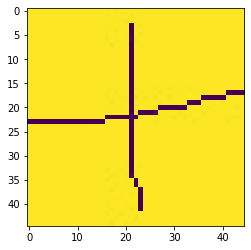

In [41]:

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
img = 'C:/Dataset/+/exp12345.jpg'
#img = 'Downloads/canvas-img (4).png'
image = cv2.imread(img, 0)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [42]:
image = np.reshape(image, (1, 45, 45, 1))
image = image / 255
pred = model.predict(image)
print(pred)

[[9.9971646e-01 2.4992253e-06 2.8100406e-04]]
